# Exercise 1

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import os
import pandas as pd

## Question 1

Calculate the past 20 ka bottom water oxygen isotope signal, $\mathrm{\delta^{18}O_{SW}}$, using:

$$
\delta^{18}O_{SW} = \delta^{18}O_{C} + 0.27 - \frac{4.38 - \sqrt{4.38^2 - 4 * 0.1(16.9 - T)}}{2 * 0.1} - \delta^{18}O_{ice}
$$

Where $\delta^{18}O_{C}$ is the raw signal in benthic foram carbonate, $\delta^{18}O_{ice}$ is the ice volume correction, and $T$ is the temperature of calcification determined from an indepent Mg/Ca proxy via:

$$
T = \frac{Mg/Ca - 0.96}{0.12}
$$

In [2]:
df = pd.read_csv('data/RaPiD-10-1P_M_barleeanuum.csv', index_col=0)

In [3]:
# Find independent temperature of calcification
df['Temp'] = (df.Mg_Ca - 0.96)/0.12

# Find delta-18-O of seawater
df['d18Osw'] = df.d18Oc + 0.27 - (4.38 - (4.38**2 - 4 * 0.1 * (16.9 - df.Temp))**0.5) / (2*0.1) - df.d18Oice

### Plot $T$ and $\delta^{18}O_{SW}$

Mg/Ca measurements are determined to be significantly contaminated by silicate material if $ \frac{Fe/Ca}{Mg/Ca} > 0.1 $, and must be rejected.

In [4]:
# Determine contaminated
df['bad'] = (df.Fe_Ca/df.Mg_Ca) > 0.1

In [5]:
import matplotlib as mpl

In [6]:
def scatter_temp_d18Osw(df, figsize=None):
    """ Return `matplotlib.pyplot.Figure` plotting Temp x del18Osw scatter, with contaminated points marked. """
    fig, ax = plt.subplots(figsize=figsize)
    # Ensure bad points plotted on top of good
    for subset, facecolors, edgecolors in zip((~df.bad, df.bad),
                                              ('lightblue', 'none'),
                                              ('blue', 'red')):
        ax.scatter(*df[['Temp', 'd18Osw']][subset].T.values,
                   edgecolors=edgecolors, facecolors=facecolors)
    ax.set_xlabel('Temperature (\u00B0 C)')
    ax.set_ylabel('$\delta^{18}O_{SW}$ (\u2030)')
    
    return fig

In [7]:
def time_series(df, figsize=None):
    """ Return `matplotlib.pyplot.Figure` plotting Temp and del18Osw timeseries, with contaminated points marked. """
    fig, axarr = plt.subplots(2, sharex=True, figsize=figsize)
    cols = ('Temp', 'd18Osw')
    ylabels = ('Temperature (\u00B0 C)', '$\delta^{18}O_{SW}$ (\u2030)')
    for ax, col, ylabel in zip(axarr, cols, ylabels):
        ax.plot(df[col][~df.bad], ls='-', c='blue', linewidth=1) # line
        series = df[col][df.bad]
        ax.scatter(series.index, series, # bad points
                   edgecolors='red', facecolors='none')

        ax.set_ylabel(ylabel)

        # Mark Heinrich Stadial 1
        for hsdate in (14.7, 17.):
            ax.axvline(hsdate, color='g', ls='--')
    ax.set_xlabel('Age (ka)')

    fig.subplots_adjust(hspace=0.05)
    plt.gca().invert_xaxis()
    
    return fig

### Save figures

In [8]:
# Image defaults
img_dir = 'img'
img_format = 'pdf'
width = 7 # inches

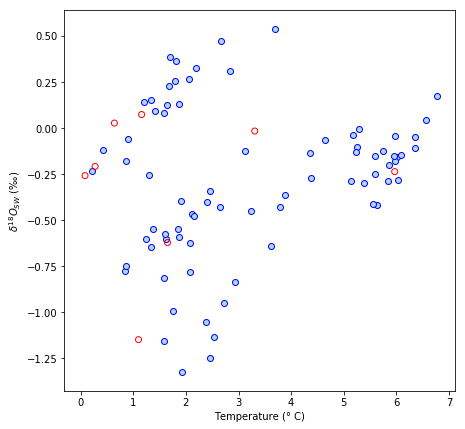

In [9]:
fig = scatter_temp_d18Osw(df, figsize=(width, width))
img_name = 'scatter_temp_x_d18Osw'
fig.savefig('.'.join((os.path.join(img_dir, img_name), img_format)))

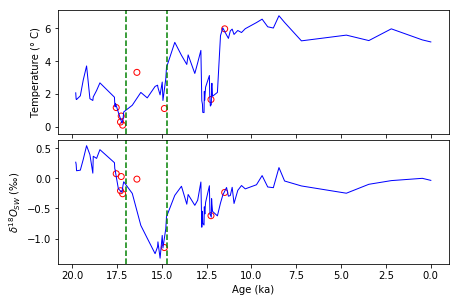

In [10]:
fig = time_series(df, figsize=(width, width/1.5))
img_name = 'timeseries_temp_and_d18Osw'
fig.savefig('.'.join((os.path.join(img_dir, img_name), img_format)))